In [ ]:
# Importing data and creating one usable dataset

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Intializing the dataframe
df = pd.DataFrame()

# Creating a year column and merging the data to one dataset
for year in range(2015, 2024):
    filename = f'...\\Happiness_analysis\\WHR_{year}.csv'
    data = pd.read_csv(filename)
    data['year'] = year
    df = pd.concat([df, data], ignore_index=True)

print(df.head())

# Converting to a new excel file
df.to_csv("Happiness_Data(2015-2023).csv", index=False)


       country                 region  happiness_score  gdp_per_capita  \
0  Switzerland         Western Europe            7.587         1.39651   
1      Iceland         Western Europe            7.561         1.30232   
2      Denmark         Western Europe            7.527         1.32548   
3       Norway         Western Europe            7.522         1.45900   
4       Canada  North America and ANZ            7.427         1.32629   

   social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
0         1.34951                  0.94143                       0.66557   
1         1.40223                  0.94784                       0.62877   
2         1.36058                  0.87464                       0.64938   
3         1.33095                  0.88521                       0.66973   
4         1.32261                  0.90563                       0.63297   

   generosity  perceptions_of_corruption  year  
0     0.29678                    0.41978  2015  


In [ ]:
# Renaming the data for readability purposes
happy_data = pd.read_csv(r"...\Happiness_analysis\Happiness_Data(2015-2023).csv")
print(happy_data.head())

       country                 region  happiness_score  gdp_per_capita  \
0  Switzerland         Western Europe            7.587         1.39651   
1      Iceland         Western Europe            7.561         1.30232   
2      Denmark         Western Europe            7.527         1.32548   
3       Norway         Western Europe            7.522         1.45900   
4       Canada  North America and ANZ            7.427         1.32629   

   social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
0         1.34951                  0.94143                       0.66557   
1         1.40223                  0.94784                       0.62877   
2         1.36058                  0.87464                       0.64938   
3         1.33095                  0.88521                       0.66973   
4         1.32261                  0.90563                       0.63297   

   generosity  perceptions_of_corruption  year  
0     0.29678                    0.41978  2015  


In [3]:
# Size of the data
print(happy_data.shape)

(1367, 10)


In [4]:
# Types of data
print(happy_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1367 non-null   object 
 1   region                        1367 non-null   object 
 2   happiness_score               1367 non-null   float64
 3   gdp_per_capita                1367 non-null   float64
 4   social_support                1367 non-null   float64
 5   healthy_life_expectancy       1366 non-null   float64
 6   freedom_to_make_life_choices  1367 non-null   float64
 7   generosity                    1367 non-null   float64
 8   perceptions_of_corruption     1366 non-null   float64
 9   year                          1367 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 106.9+ KB
None


In [5]:
# Checking for Null values
print(happy_data.isnull().sum())

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       1
year                            0
dtype: int64


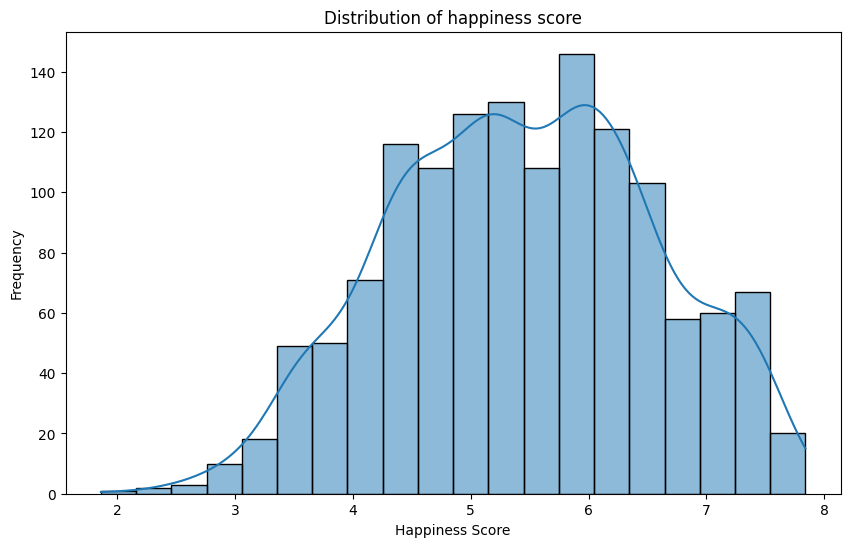

In [6]:
# Distribution of Happiness Score

plt.figure(figsize=(10,6))
sns.histplot(data=happy_data, x='happiness_score', bins=20, kde=True)
plt.title("Distribution of happiness score")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")

plt.show()

In [7]:
# Average rating over the years

avg_score_yearly = happy_data.groupby(['year']).agg(happiness_score_mean=('happiness_score', 'mean')).reset_index()

fig = px.line(
    avg_score_yearly,
    x='year',
    y='happiness_score_mean',
    markers=True
)

fig.update_layout(
    yaxis_range =[4,7],
    title={
        'text': 'Mean Happiness Change Over Years',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title ='Years',
    yaxis_title ='Mean Happiness Score'
)

fig.show()


In [ ]:
# Countries with the highest average happiness score

happiness_by_country =  happy_data.groupby(['country']).agg(happiness_score_mean=("happiness_score", "mean")).reset_index()
sorted_country = happiness_by_country.sort_values(by='happiness_score_mean', ascending=False).head(20)

fig = px.bar(
    sorted_country,
    x='country',
    y='happiness_score_mean',
    color='happiness_score_mean'
)

fig.update_layout(
    yaxis_range = (0,10),
    title={
        'text': 'Top 20 Happiest Countries(average)',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title ='Country',
    yaxis_title ='Mean Happiness Score'
)

fig.show()


In [9]:
# Region with the highest average happiness score

happiness_by_region = happy_data.groupby(['region']).agg(happiness_score_mean=('happiness_score', 'mean')).reset_index()
sorted_region = happiness_by_region.sort_values(by='happiness_score_mean', ascending=False)

fig = px.bar(
    sorted_region,
    x='region',
    y='happiness_score_mean',
    color="happiness_score_mean"
)

fig.update_layout(
    yaxis_range = (0,10),
    title={
        'text': 'Average Happiness by Region',
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title ='Region',
    yaxis_title ='Mean Happiness Score'
)

fig.show()


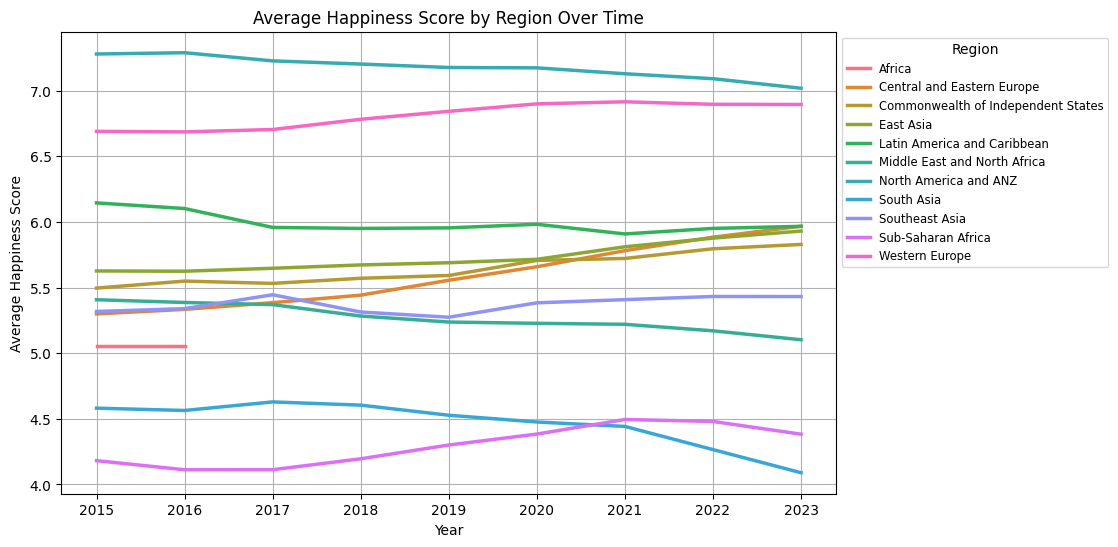

In [10]:
# Change of Happiness Over Time
region_happiness_over_time = happy_data.groupby(['region', 'year'])['happiness_score'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(
    data=region_happiness_over_time,
    x='year',
    y='happiness_score',
    hue='region',
    markers='o',
    linewidth=2.5,
)

plt.title('Average Happiness Score by Region Over Time')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.legend(title='region')
plt.grid(True)

plt.legend(
    title='Region',
    loc='upper left',
    bbox_to_anchor=(1,1),
    fontsize='small',
    title_fontsize='medium'
)

plt.show()

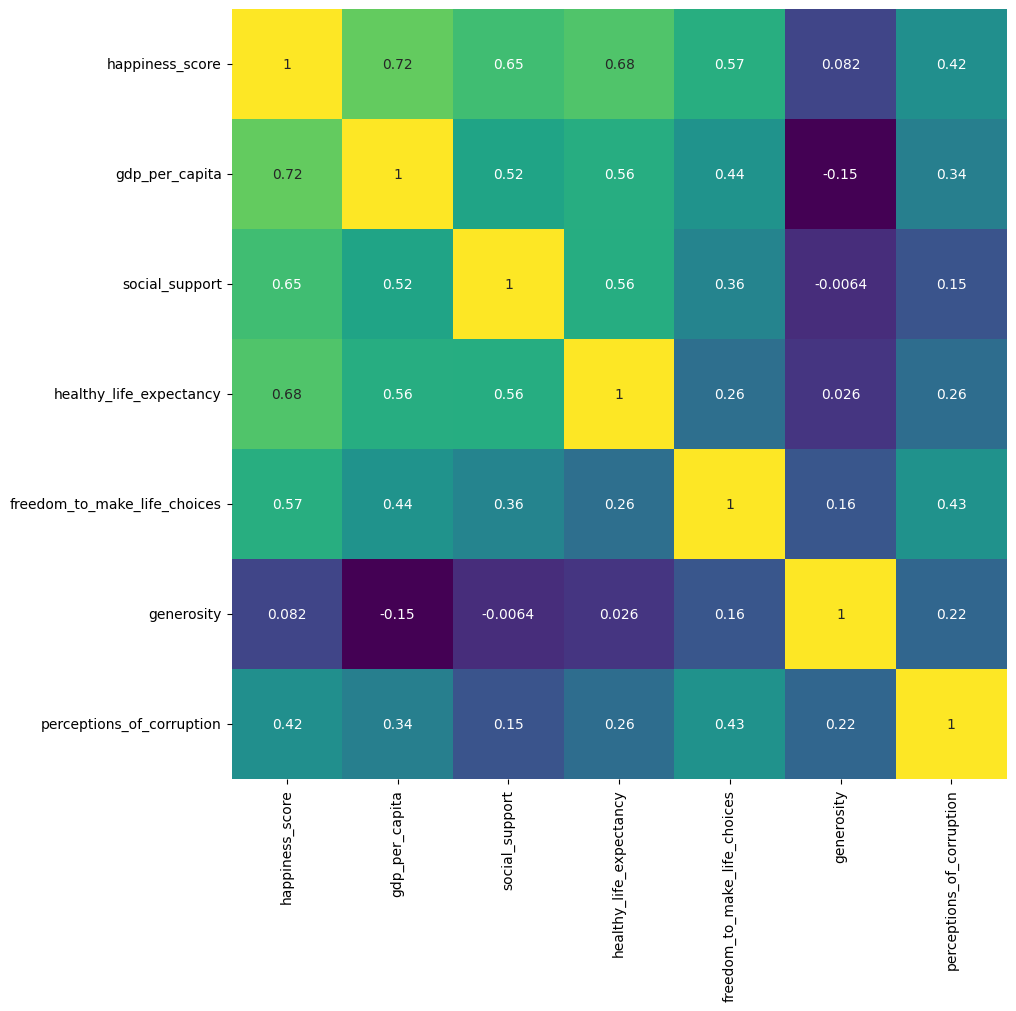

In [11]:
# Finding correlation between the different variables and Happiness

happy_correlation = happy_data.drop(['year'], axis=1, inplace=True)

plt.figure(figsize=(10,10))
sns.heatmap(happy_data.corr(numeric_only=True),cmap= 'viridis', annot=True, cbar=False)
plt.show()

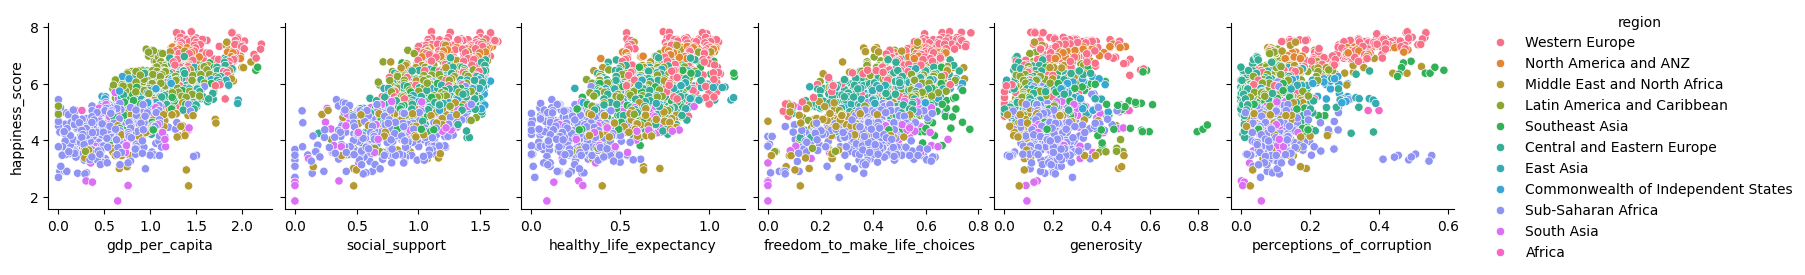

In [12]:
# Individual Factors of Happiness

sns.pairplot(happy_data, hue='region', 
             x_vars=['gdp_per_capita', 
                     'social_support', 
                     'healthy_life_expectancy',
                    'freedom_to_make_life_choices', 
                    'generosity', 
                    'perceptions_of_corruption'], 
            y_vars=['happiness_score'],
            kind='scatter'
)

plt.suptitle='Correlation Among Factors by Region'
plt.show()

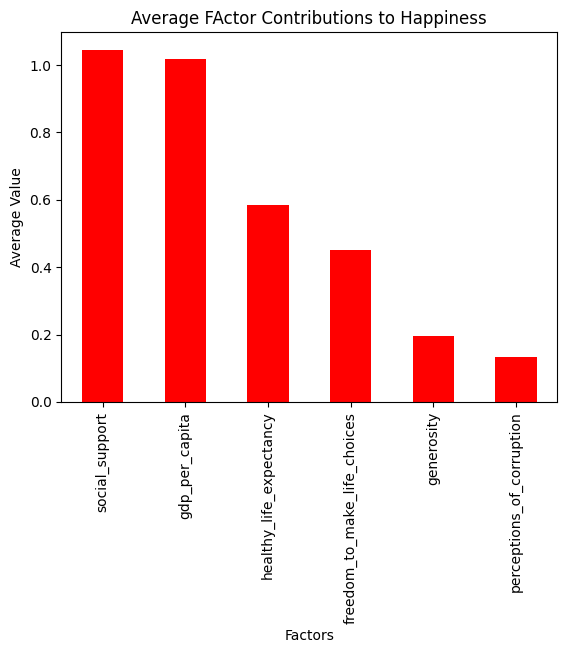

In [13]:
# Contribution each factor has on happiness

happy_factor_columns= ['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices','generosity', 'perceptions_of_corruption']
happy_factor_contributions = happy_data[happy_factor_columns].mean().sort_values(ascending=False)
happy_factor_contributions.plot(kind='bar', color='red')
plt.title("Average FActor Contributions to Happiness")
plt.xlabel("Factors")
plt.ylabel("Average Value")
plt.show()